## **Exercise 1: Descriptive Statistics & Data Visualization**

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import statsmodels as sms

### **1. Load the iris dataset**

In [2]:
# Load the iris dataset from sklearn using load_iris() function
iris = load_iris()

df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']

# print the target names
print(iris['target_names'])

# replace the clssifications with the target names
df.replace({'target': {0: 'setosa', 1: 'versicolor', 2: 'virginica'}}, inplace=True)

['setosa' 'versicolor' 'virginica']


#### Displaying the dataframe

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### **2. Descriptive Statistics**

#### Basic statistics

In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Mean

In [5]:
df.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

#### Median

In [6]:
df.median()

sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64

#### Mode

In [7]:
df.mode()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.0,3.0,1.4,0.2,setosa
1,NaN,NaN,1.5,NaN,versicolor
2,NaN,NaN,NaN,NaN,virginica


#### Variance

In [8]:
df.var()

sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64

#### Median Absolute Deviation

In [9]:
from statsmodels.robust.scale import mad

df[df.columns.values.tolist()[:-1]].apply(mad)

sepal length (cm)    1.037822
sepal width (cm)     0.444781
petal length (cm)    1.853253
petal width (cm)     1.037822
dtype: float64

#### Standard Deviation

In [10]:
df.std()

sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64

#### Quantiles

In [11]:
df.quantile([0.25, 0.5, 0.75])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0.25,5.1,2.8,1.60,0.3
0.50,5.8,3.0,4.35,1.3
0.75,6.4,3.3,5.10,1.8


#### Inter-Quantile Range

In [12]:
def get_iqr(df: pd.DataFrame) -> None:
    """Calculate the interquantile range"""
    for i in df.columns[df.dtypes==float]:
        print(f"The interquantile range for {i} is: ", df[i].quantile(0.75) - df[i].quantile(0.25))

In [13]:
get_iqr(df)

The interquantile range for sepal length (cm) is:  1.3000000000000007
The interquantile range for sepal width (cm) is:  0.5
The interquantile range for petal length (cm) is:  3.4999999999999996
The interquantile range for petal width (cm) is:  1.5


### **3. Plot a density plot for each of the variables**

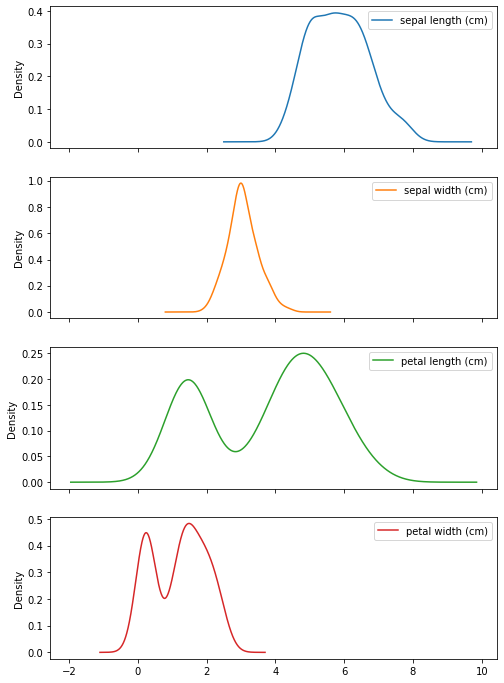

In [14]:
density_plots = df.plot.density(subplots=True, figsize=(8, 12))

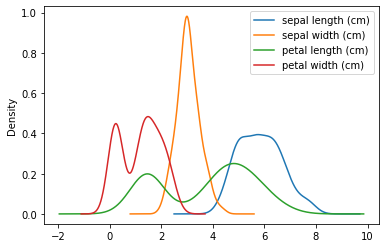

In [15]:
density_plot = df.plot.density()



* The sepal width and length have unimodal distribution.
* Sepal length has a wider distribution compared to the sepal width.
* The petal width and length are bimodal distributions.
* The petal length has a wider distribution compared to the petal width.


### **4. Create a violin plot and explain what you see in the plots?**

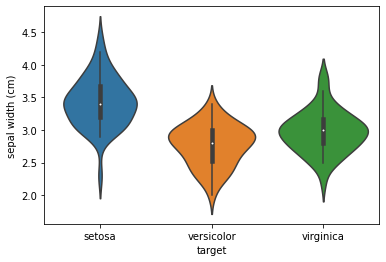

In [16]:
ax = sns.violinplot(x='target', y="sepal width (cm)", data=df)

* It can be see that the median sepal width of setosa is larger than versicolor and virginica
* There are also more outliers in setosa than in the other 2 groups
* Most of the versicolor flowers have the sepal width of 3.0cm

## **Exercise 2 - Data-preprocessing**

In [2]:
import pandas as pd

### 1. Load the heart dataset. How many rows and columns does the dataset contain?

In [3]:
heart = pd.read_csv("heart.csv")
print(f"Number of columns: {len(heart.columns)}\nNumber of rows: {len(heart.index)}")

Number of columns: 14
Number of rows: 312


### 2. How many unique values does each column contain

In [19]:
heart.nunique(0)

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

### 3. Count the number of duplicate rows in the dataset. How can you remove the duplicate rows?

In [20]:
print(f"Number of duplicated rows: {heart.duplicated().sum()}")

Number of duplicated rows: 9


In [21]:
heart.drop_duplicates(inplace=True)
heart.duplicated().sum()

0

### 4. Count the number of missing values in the dataset.

In [22]:
print(f"Number of missing values:\n{heart.isna().sum()}")

Number of missing values:
age         0
sex         3
cp          1
trestbps    1
chol        1
fbs         5
restecg     1
thalach     1
exang       0
oldpeak     1
slope       1
ca          1
thal        1
target      0
dtype: int64


### 5. How can you deal with missing values in your dataset? Implement one of the possible methods

The method to be used depends on the type of missing values. Methods of dealing with missing values fall under 2 categories:

* Deletion (e.g. listwise deletion, dropping variable)
* Imputation (Replacing NA's with Mean, Median, or Mode of the values or using [predictive models](https://scikit-learn.org/stable/modules/impute.html) such as K Neares-Means for imputation)

A full explanation of the types of missing values and methods to deal with them can be found here: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3668100/

Deletion:

In [23]:
heart.dropna(inplace=True)
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Imputation:

In [6]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2, weights="uniform")
pd.DataFrame(imputer.fit_transform(heart), columns=heart.columns, index=heart.index).isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## **Exercise 3 - Correlation**

In [24]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### **1. Load the dataset from the dataset.tsv file**

In [25]:
dataset = pd.read_table("dataset.csv", index_col=0)

### **2. Plot the scatterplot matrix. What can be seen in the scatterplot matrix?**

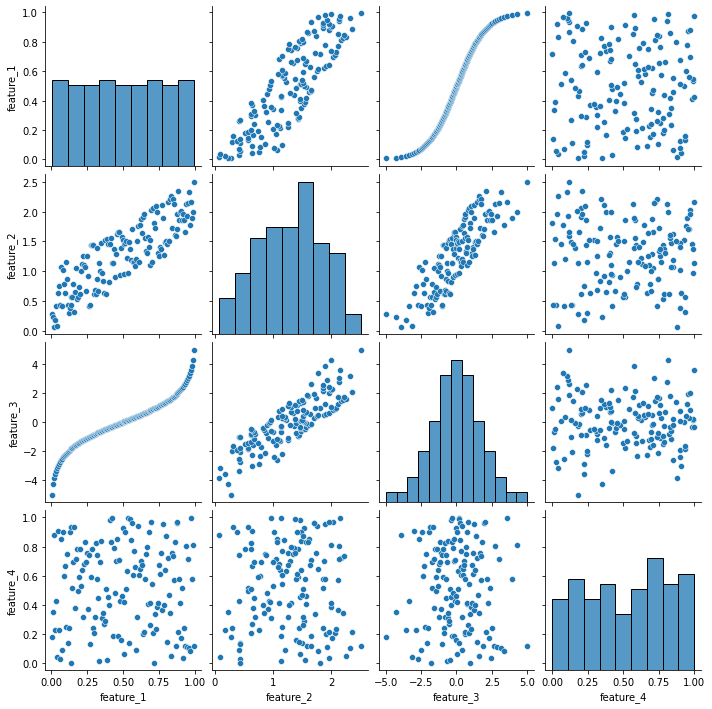

In [26]:
sns.pairplot(dataset)

#### Any 2 out of 4: 

* It can be seen that feature_1 and feature_3 are non-linearly related
* feature_1 and feature_2 are also non-linear but with a slight randomness (not necessary to identify the randomness)
* feature_4 seems to have no correlation with any other features
* feature_2 and feature_3 are linearly related.

### **3. Which correlation would suit the comparison of feature_1 and feature_3. Calculate the correlation value.**

In [27]:
print(f"Pearson's correlation coefficent: {dataset['feature_1'].corr(dataset['feature_3'], method='pearson')}")
print(f"Spearman's correlation coefficent: {dataset['feature_1'].corr(dataset['feature_3'], method='spearman')}")

Pearson's correlation coefficent: 0.9685071155522017
Spearman's correlation coefficent: 1.0


* They need to identify feature_1 and feature_3 are non-linearly related and print the spearman correlation. 
* 1.5 points if they do pearson's instead.

### **4. Plot the correlation heatmap for the entire dataset**

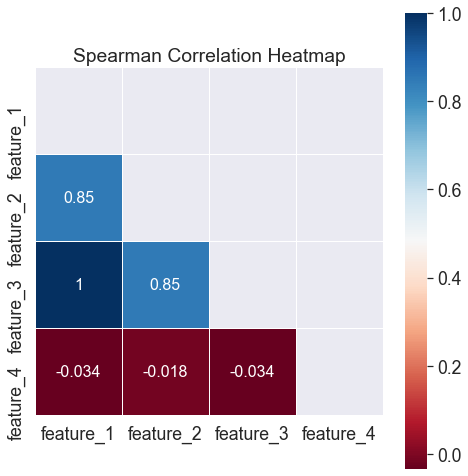

In [28]:
spear_corr = dataset.corr(method='spearman')
spear_mask = np.zeros_like(spear_corr.values)
spear_mask[np.triu_indices_from(spear_mask)] = True

sns.set(font_scale=1.6)
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

with sns.axes_style("white"):
    sns.heatmap(spear_corr, mask=spear_mask, annot=True, fmt=".2g", annot_kws={'fontsize': 'small'}, square=True, linewidths=.5, cmap="RdBu", ax=ax)
    ax.set_title('Spearman Correlation Heatmap')

plt.tight_layout()
plt.show()